# Import the needed libraries

In [1]:
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Plotly libraries
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
# SCIKIT tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Holoviews libraries
import holoviews as hv
from holoviews import opts
from holoviews import dim

# Autism in Toddlers, and how to identify

Our group was interested in the research done on Autism in Toddlers, and what kinds of observations they had made. We were not sure what to expect from this data at first, but we were generally interested in seeing what behavioral markers most closely correlate with toddlers who have autism, or are developing it.

Our desire was to make some conclusions about this correlation, and what kinds of behaviors contribute most to the recognition or identification of Autism in toddlers.

## About the Autism Dataset

The dataset was developed by Dr Fadi Fayez using a mobile app called ASDTests (ASDtests.com) to screen autism in toddlers. The data have been collected after the necessary ethical approval for the early screening of ASD traits. I included 2 datasets (1 for toddlers) and 1 that combines all ages (toddlers, children, adolescents, and adults).
See the description file attached with the CSV data to know more about the variables and the class.
This data can be used for descriptive and predictive analyses such as classification, clustering, regression, etc. You may use it to estimate the predictive power of machine learning techniques in detecting autistic traits
For toddlers (Q-chat10 medical questionnaire was used) and for children, adolescents, and adults (AQ-10 short versions of these age categories have been used).

Abstract: Autistic Spectrum Disorder (ASD) is a neurodevelopmental condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy, and procedures are not cost-effective. The economic impact of autism and the increase in the number of ASD cases across the world reveal an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue a formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behavioural traits. However, such datasets are rare, making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity, and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available, and most of them are genetic. Hence, we propose a new dataset related to autism screening of toddlers that contains influential features to be utilised for further analysis, especially in determining autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (Q-Chat-10) plus other individual characteristics that have proved to be effective in detecting ASD cases from controls in behaviour science.

Source: Fayez Thabtah<br>
Department of Digital Technology<br>
Manukau Institute of Technology,<br>
Auckland, New Zealand<br>
fadi.fayez@manukau.ac.nz<br>
Data Type: Predictive and Descriptive: Nominal/categorical, binary, and continuous<br>
Task: Classification<br>
Attribute Type: Categorical, continuous, and binary<br>
Area: Medical, health, and social science<br>
Format Type: Non-Matrix<br>
Does your data set contain missing values? No<br>
Number of Instances (records in your data set): 1054<br>
Number of Attributes (fields within each record): 18, including the class variable<br>

&nbsp; &nbsp; &nbsp; &nbsp; Behavior Questions:<br>
&nbsp; &nbsp; &nbsp; &nbsp; Table 1: Details of variables mapping to the Q-Chat-10 screening methods

| Variable in Dataset | Corresponding Q-chat-10-Toddler Features |
| -------- | ------- |
| A1 | Does your child look at you when you call his/her name? |
| A2 | How easy is it for you to get eye contact with your child? |
| A3 | Does your child point to indicate that s/he wants something? (e.g., a toy that is out of reach) |
| A4 | Does your child point to share an interest with you? (e.g., pointing at an interesting sight) |
| A5 | Does your child pretend? (e.g., care for dolls, talk on a toy phone) |
| A6 | Does your child follow where you’re looking? |
| A7 | If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them) |
| A8 | Would you describe your child’s first words as: Delayed or on time, Unusual in form (e.g., echolalic, scripted), socially directed or functional |
| A9 | Does your child use simple gestures? (e.g., wave goodbye) |
| A10 | Does your child stare at nothing with no apparent purpose? |

&nbsp; &nbsp; &nbsp; &nbsp; Attributes:<br>
&nbsp; &nbsp; &nbsp; &nbsp; Table 2: Attributes for the Toddlers CSV file

| Feature | Type | Description |
| -------- | ------- | ------- |
| A1 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A2 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A3 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A4 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A5 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A6 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A7 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A8 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A9 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| A10 Answer | Binary (0, 1) | The answer code of the question based on the screening method used |
| Age | Number | Toddlers (months) |
| Score by Q-chat-10 | Number	1-10 | (Less that or equal 3 no ASD traits; > 3 ASD traits |
| Sex | Character | Male or Female |
| Ethnicity | String | List of common ethnicities in text format |
| Born with jaundice | Boolean  (yes or no) | Whether the case was born with jaundice |
| Family member with ASD history | Boolean  (yes or no) | Whether any immediate family member has a PDD |
| Who is completing the test | String | Parent, self, caregiver, medical staff, clinician, etc. |
| Why_are_you_taken_the_screening | String | Use input textbox |
| Class variable | String | ASD traits or No ASD traits (automatically assigned by the ASDTests app). (Yes / No) |


## Load the Datasets

The first dataset is the combined screening data, which includes information about toddlers and adults. The second dataset has information only on toddlers, and some information about the parents.

In [2]:
df_combined = pd.read_csv('Autism-Data/Autism_Screening_Data_Combined.csv')
df_toddlers = pd.read_csv('Autism-Data/Toddler Autism dataset July 2018.csv')

### Clean up empty or missing values

This will ensure that empty fields are marked with some 'Unknown' value instead of being left as empty

In [3]:
# Handle missing values (example)
df_combined.fillna('Unknown', inplace=True)

df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jauundice   6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES


In [4]:
# Handle missing values (example)
df_toddlers.fillna('Unknown', inplace=True)

df_toddlers.info()
df_toddlers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


#### Remove the trailing or leading white spaces

Some column names have trailing or leading white spaces, which makes referencing them hard. This will clean that up.

In [5]:
print(df_toddlers.columns.tolist())
df_toddlers.columns = df_toddlers.columns.str.strip()
print(df_toddlers.columns.tolist())

['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ']
['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits']


# Characteristics of the Dataset

The correlations between the questions and the identification of Autism are what we are looking for. Several different Principal Component Analysis (PCA) visualizations were done to try and understand where the data was correlated for additional inspection.

# Josh's Graphs

In [6]:
# Manual map booleans to integers
df_toddlers['ASD_numeric'] = df_toddlers['Class/ASD Traits'].map({'Yes': 1, 'No': 0})
df_toddlers['ASD_family_numeric'] = df_toddlers['Family_mem_with_ASD'].map({'yes': 1, 'no': 0})
df_toddlers['Jaundice_numeric'] = df_toddlers['Jaundice'].map({'yes': 1, 'no': 0})

# Load and preprocess data
X = df_toddlers.select_dtypes(include=['float', 'int'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plotly static images
# Set default renderer to 'png' for static images in plotly (3D graphs)
pio.renderers.default = "png"  # or "svg" for vector graphics

## PCA Analysis

Some initial insight into the dataset, to see how the Qchat scores and the total score, compared with the boolean fields, correlate.

In [7]:
# Define features to use for PCA
df = df_toddlers.copy()
features_for_pca = [f"A{i}" for i in range(1, 11)] 
X_Limited = df[features_for_pca].astype(float)

# Fit PCA
pca = PCA(n_components=3)
pca.fit(X_Limited)
loadings = pca.components_.T  # shape (features, PCs)

# PC scores for each sample
pc_scores = pca.transform(X_Limited)

# Print top contributing features per PC
n_top = 5
for i in range(3):
    print(f"\nTop {n_top} features for PC{i+1}:")
    sorted_idx = np.argsort(np.abs(loadings[:, i]))[::-1]
    for idx in sorted_idx[:n_top]:
        print(f"  {features_for_pca[idx]}: loading = {loadings[idx, i]:.3f}")

# Correlations of PCs with target features
targets = ["Qchat-10-Score", "ASD_numeric", "ASD_family_numeric", "Jaundice_numeric"]
for i in range(3):
    print(f"\nCorrelations of PC{i+1} scores:")
    for t in targets:
        corr = np.corrcoef(pc_scores[:, i], df[t])[0,1]
        print(f"  with {t}: {corr:.3f}")

# Feature correlations with Qchat-10-Score
feature_corrs = df[features_for_pca].corrwith(df["Qchat-10-Score"])
print("\nFeature correlations with Qchat-10-Score:")
print(feature_corrs.sort_values(ascending=False))


Top 5 features for PC1:
  A9: loading = 0.374
  A5: loading = 0.358
  A6: loading = 0.357
  A4: loading = 0.356
  A1: loading = 0.321

Top 5 features for PC2:
  A10: loading = 0.615
  A2: loading = 0.393
  A3: loading = -0.384
  A1: loading = 0.345
  A4: loading = -0.339

Top 5 features for PC3:
  A10: loading = 0.671
  A1: loading = -0.472
  A2: loading = -0.389
  A8: loading = 0.308
  A3: loading = 0.152

Correlations of PC1 scores:
  with Qchat-10-Score: 0.991
  with ASD_numeric: 0.812
  with ASD_family_numeric: 0.008
  with Jaundice_numeric: 0.026

Correlations of PC2 scores:
  with Qchat-10-Score: 0.104
  with ASD_numeric: 0.080
  with ASD_family_numeric: 0.031
  with Jaundice_numeric: 0.026

Correlations of PC3 scores:
  with Qchat-10-Score: 0.080
  with ASD_numeric: 0.017
  with ASD_family_numeric: -0.059
  with Jaundice_numeric: 0.016

Feature correlations with Qchat-10-Score:
A9     0.671638
A6     0.659377
A5     0.649518
A4     0.642890
A7     0.619053
A1     0.614064
A3   

## PCA Observations

It seems that PC1 reflects correlation with Diagnostic Results (ASD Class and Qchat-10-Score, which suggests that loadings in this Principal Component (PC) correlate with Autism Diagnosis. PC2 reflects behavior data, specifically behaviors that involve eye contact, and likely reflect correlation around these types of non-verbal behaviors. PC3 reflects behavior data, specifically behaviors that involve verbal communication, and likely reflects correlation around these types of verbal behaviors.

PC2 and PC3 do not show any strong correlation to any of the other features: "Qchat-10-Score", "ASD_numeric", "ASD_family_numeric", or "Jaundice_numeric". This suggests a strong correlation only to the Qchat questions and how they relate to each other. Additionally, all questions seem to have a strong impact on the final score, except for A10, which has the lowest correlation, and substantially less than the rest of the questions.

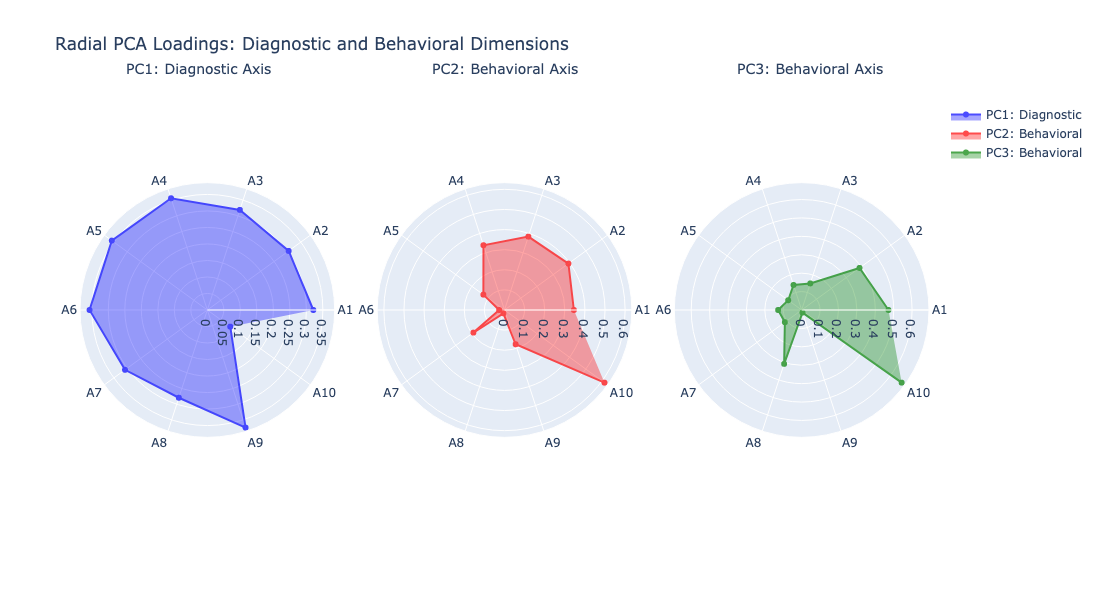

In [8]:
# Define features to use for PCA
df = df_toddlers.copy()
features_for_pca = [f"A{i}" for i in range(1, 11)]
X_Limited = df[features_for_pca].astype(float)

# Fit PCA
pca = PCA(n_components=3)
pca.fit(X_Limited)
loadings = pca.components_.T  # shape (features, PCs)

# PC scores for each sample
pc_scores = pca.transform(X_Limited)

# Create subplots with three radial axes
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}]],
    subplot_titles=("PC1: Diagnostic Axis", "PC2: Behavioral Axis", "PC3: Behavioral Axis")
)

# Add PC1 trace (left)
fig.add_trace(go.Scatterpolar(
    r=np.abs(loadings[:, 0]),  # PC1 loadings
    theta=X_Limited.columns,
    fill='toself',
    name='PC1: Diagnostic',
    line_color='blue',
    opacity=0.7
), row=1, col=1)

# Add PC2 trace (middle)
fig.add_trace(go.Scatterpolar(
    r=np.abs(loadings[:, 1]),  # PC2 loadings
    theta=X_Limited.columns,
    fill='toself',
    name='PC2: Behavioral',
    line_color='red',
    opacity=0.7
), row=1, col=2)

# Add PC3 trace (right)
fig.add_trace(go.Scatterpolar(
    r=np.abs(loadings[:, 2]),  # PC3 loadings
    theta=X_Limited.columns,
    fill='toself',
    name='PC3: Behavioral',
    line_color='green',
    opacity=0.7
), row=1, col=3)

# Layout adjustments
fig.update_layout(
    title_text="Radial PCA Loadings: Diagnostic and Behavioral Dimensions",
    annotations=[
        dict(
            x=0.14,
            y=1.05,
            xref="paper",
            yref="paper",
            text="PC1: Diagnostic Axis",
            showarrow=False,
            font=dict(size=14)
        ),
        dict(
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            text="PC2: Behavioral Axis",
            showarrow=False,
            font=dict(size=14)
        ),
        dict(
            x=0.86,
            y=1.05,
            xref="paper",
            yref="paper",
            text="PC3: Behavioral Axis",
            showarrow=False,
            font=dict(size=14)
        )
    ],
    polar1=dict(domain=dict(x=[0.0, 0.30])),
    polar2=dict(domain=dict(x=[0.35, 0.65])),
    polar3=dict(domain=dict(x=[0.70, 1.0])),
    width=1100,
    height=600
)

# Consistent hover template across traces
fig.update_traces(
    hovertemplate="<b>%{theta}</b><br>Loading: %{r:.3f}<extra></extra>"
)

# Save the graph as a PNG
fig.write_image("Stage3-Radial-PCA-Inference.png", scale=3)

# Show the visualization
fig.show()

## Observations

The strongest correlative factors from the PC1 were the Qchat 10 Questions, and this suggests that it is strongly correlated to Qchat-10-Score and ASD Diagnosis. From the PC2 perspective, it looks like A10, A3, A2, and A4 are strongly correlated and suggest a relation between these non-verbal behaviors. In PC3, A10, A8, A1, and A2 are strongly correlated and suggest a relation between those verbal behavioral questions.

## Key Insights

We will want to compare the Qchat-10-Score and the Family_ASD columns when wanting to see how Autism was detected amongst toddlers. When it comes to which questions affected the Qchat-10-Score, it looks like A10, A1, A2, A3, and A4 are the strongest factors that contribute to that final score, and we will want to inspect those features more closely when detecting the accuracy of the Qchat-10-Score questions.

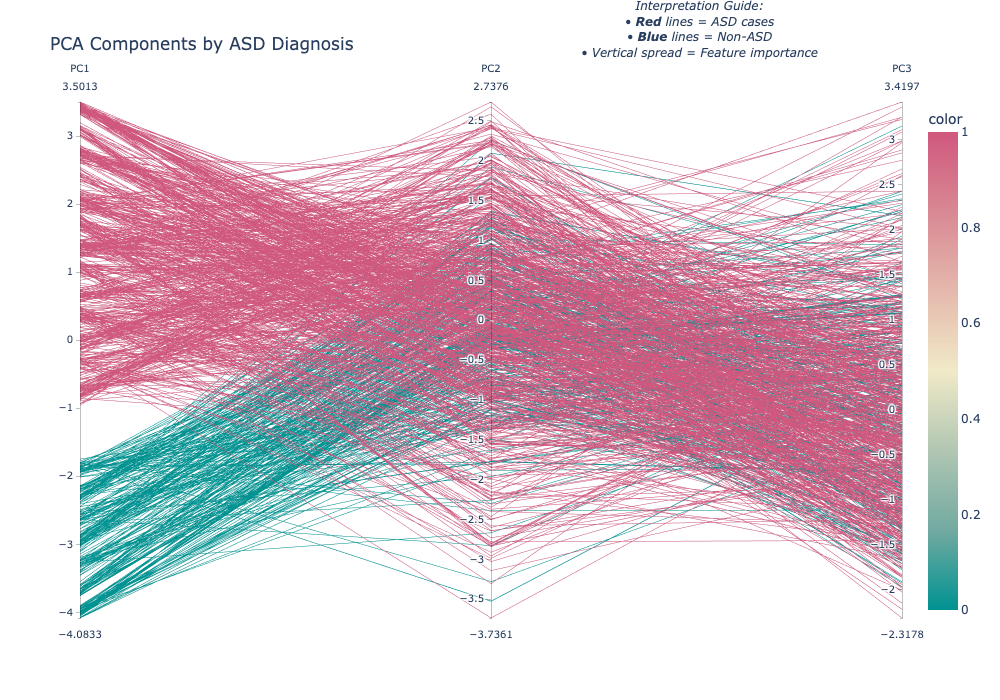

In [9]:
# Load and preprocess data
X = df_toddlers.select_dtypes(include=['float', 'int'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(X_scaled)

# Create a properly labeled DataFrame
pca_df = pd.DataFrame(components, columns=['PC1','PC2','PC3'])
pca_df['Diagnosis'] = df_toddlers['Class/ASD Traits']

# Plot
fig = px.parallel_coordinates(
    pca_df,
    dimensions=['PC1','PC2','PC3'],
    color=pca_df['Diagnosis'].map({'Yes':1, 'No':0}),
    color_continuous_scale=px.colors.diverging.Tealrose,
    title="PCA Components by ASD Diagnosis"
)

# Update the figure layout
fig.update_layout(
    annotations=[
        dict(
            x=0.9, y=1.2,
            xref="paper", yref="paper",
            text="<i>Interpretation Guide:<br>"
                 "• <b>Red</b> lines = ASD cases<br>"
                 "• <b>Blue</b> lines = Non-ASD<br>"
                 "• Vertical spread = Feature importance</i>",
            showarrow=False,
        )
    ],
    width=1000,
    height=700
)

# Save the graph as a PNG
fig.write_image("Stage3-ParallelCoordinate-PCA-Diagnosis.png", scale=3)

# Show the visualization
fig.show()

## Observations

It is clear that many of the PC1 elements that are highly correlated span the length of PC2 and PC3. This shows how the features correlate when related to the Diagnosis of Autism (Class/ASD Traits feature). PC1 is a discriminator as the colors cluster and separate. This can tell us that PC1 is the most insightful correlation when it comes to whether a toddler has Autism or not. PC2 is a slight discriminator for toddlers without Autism, but there is noise since toddlers with Autism do not cluster. PC3 shows no clustering at all and suggests a low correlation factor for Diagnosis due to overlapping noise.

## Key Insights

PC1 is the correlation we want to use in looking at relatability, since these features will be the most related to a potential Autism diagnosis. We now have a much better sense of how the features relate to each other and where interesting observations are likely to be found.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
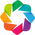

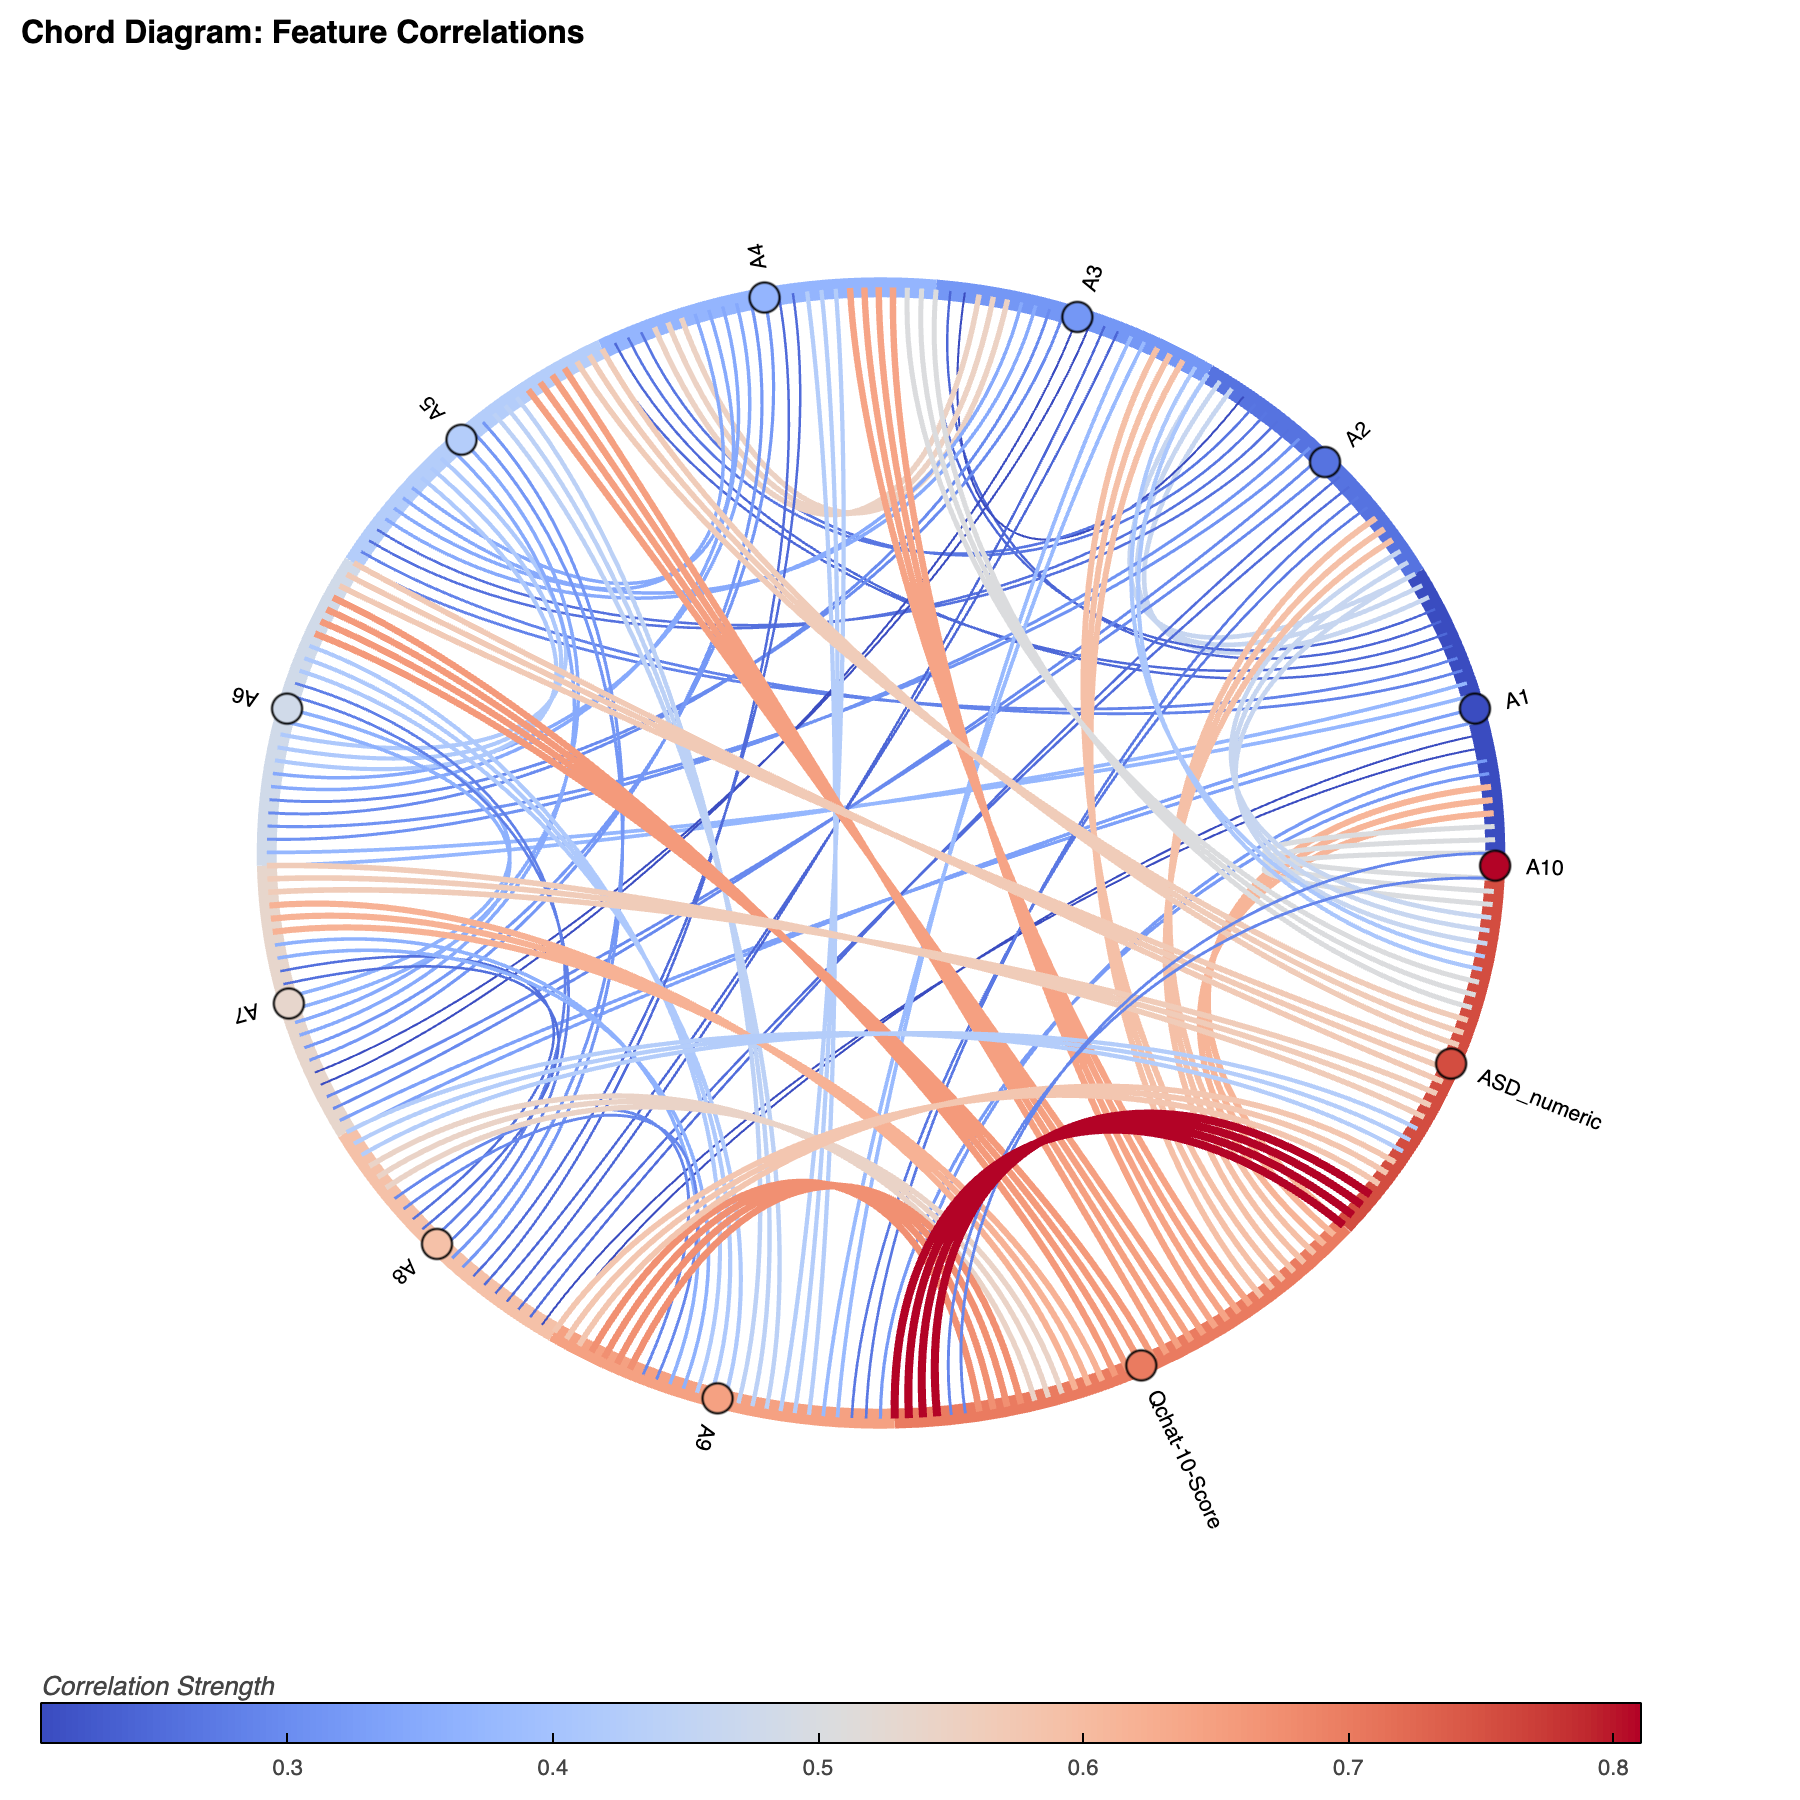

In [23]:
# Needed for Jupyter Holoviews support
hv.extension('bokeh')

# Reduce the data
features = [f"A{i}" for i in range(1, 11)] + ['Age_Mons', 'Qchat-10-Score', 'ASD_numeric']

# Correlate on those features
corr = df_toddlers[features].corr()

# Get edges with correlation strength
edges = []
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        val = corr.iloc[i, j]
        if abs(val) > 0.2:  # Threshold
            edges.append((corr.index[i], corr.columns[j], val))

# Create edges DataFrame
edges_df = pd.DataFrame(edges, columns=['source', 'target', 'value'])

# Create a nodes DataFrame with unique names and indices
nodes_df = pd.DataFrame({'name': pd.unique(edges_df[['source', 'target']].values.ravel())})
nodes_df['index'] = nodes_df.index

# Map source and target names to node indices
edges_df['source'] = edges_df['source'].map(nodes_df.set_index('name')['index'])
edges_df['target'] = edges_df['target'].map(nodes_df.set_index('name')['index'])

# Convert to hv.Dataset explicitly — this is the key!
nodes_dataset = hv.Dataset(nodes_df, 'index')

# Convert edges_df to hv.Dataset with key dimensions and value dimension
edges_dataset = hv.Dataset(edges_df, kdims=['source', 'target'], vdims=['value'])

# Build the visualization based on the nodes and edges
chord = hv.Chord((edges_dataset, nodes_dataset)).opts(
    opts.Chord(
        labels='name',
        cmap='coolwarm',
        edge_color=dim('value'),
        edge_line_width=dim('value') * 5,
        edge_cmap='coolwarm',
        clim=(edges_df['value'].min(), edges_df['value'].max()),
        node_color='name',
        width=900,
        height=900,
        colorbar=True,
        colorbar_position='bottom',
        colorbar_opts={
            'width': 800,
            'height': 20,
            'title': 'Correlation Strength'
        },
        title="Chord Diagram: Feature Correlations"
    )
)

# Show the holoview chord
chord

from IPython.display import Image
Image("Stage3-ChordDiagram-PCA-Graph.png")

## Observations

The strongest correlative factors from the PC1 were the Qchat-10-Score and the ASD_numeric. These are both related to the total Qchat score of the toddler, and if they have a parent or immediate relative with ASD (ASD_numeric from boolean). From the PC2 perspective, it looks like A10, A3, A4, and Age_mons (Age in months) are strongly correlated

## Key Insights

We will want to compare the Qchat-10-Score and the Family_ASD columns when wanting to see how Autism was detected amongst toddlers. When it comes to which questions affected the Qchat-10-Score, it looks like A10, A3, A4, and their age (in months) are the strongest factors that contribute to that final score, and we will want to inspect those features more closely when detecting the accuracy of the Qchat-10-Score questions.

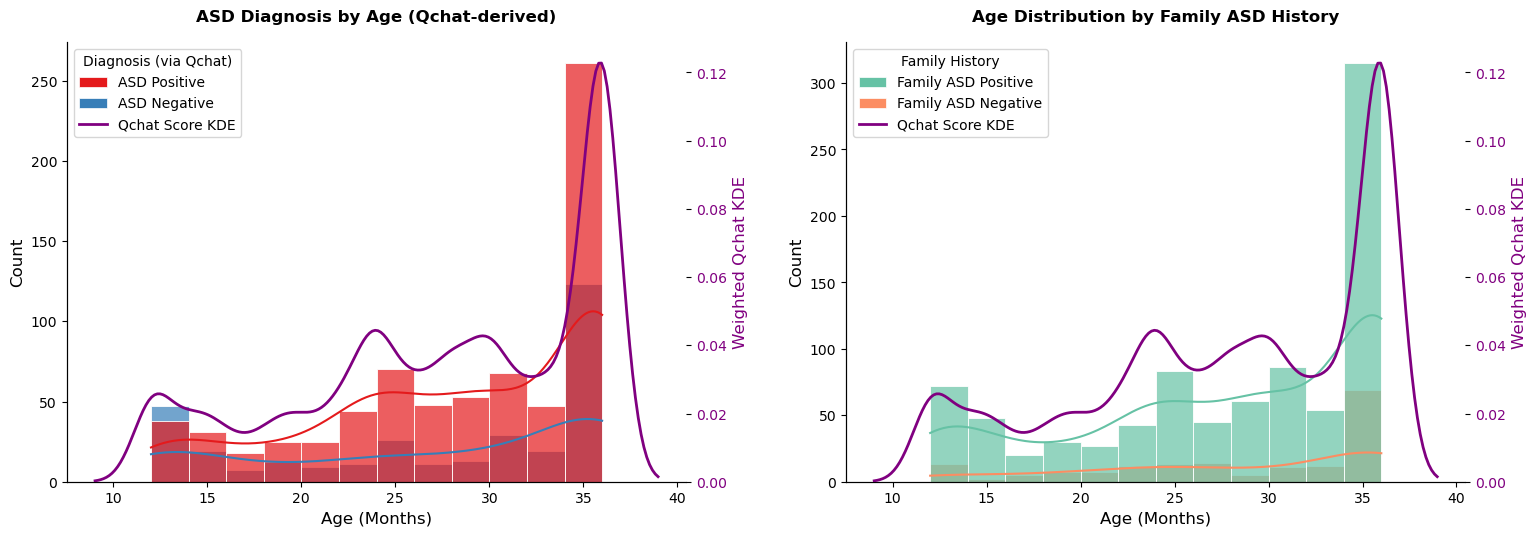

In [11]:
plt.figure(figsize=(16, 6))

# Custom color palettes
asd_palette = sns.color_palette("Set1", n_colors=2)
family_palette = sns.color_palette("Set2", n_colors=2)

# First plot: ASD Diagnosis via Qchat Scores
plt.subplot(1, 2, 1)
ax1 = sns.histplot(x='Age_Mons',
                   hue='Class/ASD Traits',
                   data=df_toddlers,
                   kde=True,
                   palette=asd_palette,
                   hue_order=['Yes', 'No'],
                   element='bars',
                   alpha=0.7,
                   edgecolor='white',
                   linewidth=0.6)

# Create secondary y-axis
ax1b = ax1.twinx()

# Plot KDE on the secondary y-axis
sns.kdeplot(data=df_toddlers,
            x='Age_Mons',
            weights=df_toddlers['Qchat-10-Score'],
            bw_adjust=0.5,
            color='purple',
            lw=2,
            label='Qchat KDE',
            ax=ax1b)

# Adjust secondary y-axis label
ax1b.set_ylabel('Weighted Qchat KDE', fontsize=12, color='purple')
ax1b.tick_params(axis='y', labelcolor='purple')

# Adjust the primary layout settings
ax1.set_title('ASD Diagnosis by Age (Qchat-derived)', pad=15, fontweight='bold')
ax1.set_xlabel('Age (Months)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Setup the patches
asd_patches = [
    plt.Rectangle((0,0),1,1, fc=asd_palette[0], ec='white', linewidth=0.5),
    plt.Rectangle((0,0),1,1, fc=asd_palette[1], ec='white', linewidth=0.5)
]
# Setup the legend
ax1.legend(asd_patches + [plt.Line2D([], [], color='purple', lw=2)],
           ['ASD Positive', 'ASD Negative', 'Qchat Score KDE'],
           title='Diagnosis (via Qchat)',
           frameon=True,
           facecolor='white')

# Second plot: Family ASD History by Age
plt.subplot(1, 2, 2)
ax2 = sns.histplot(x='Age_Mons',
                   hue='Family_mem_with_ASD',
                   data=df_toddlers,
                   kde=True,
                   palette=family_palette,
                   element='bars',
                   alpha=0.7,
                   edgecolor='white',
                   linewidth=0.6)

# Create secondary y-axis
ax2b = ax2.twinx()

# Plot KDE on the secondary y-axis
sns.kdeplot(data=df_toddlers,
            x='Age_Mons',
            weights=df_toddlers['Qchat-10-Score'],
            bw_adjust=0.5,
            color='purple',
            lw=2,
            label='Qchat KDE',
            ax=ax2b)

# Adjust secondary y-axis label
ax2b.set_ylabel('Weighted Qchat KDE', fontsize=12, color='purple')
ax2b.tick_params(axis='y', labelcolor='purple')

# Adjust the primary layout settings
ax2.set_title('Age Distribution by Family ASD History', pad=15, fontweight='bold')
ax2.set_xlabel('Age (Months)', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

family_patches = [
    plt.Rectangle((0,0),1,1, fc=family_palette[0], ec='white', linewidth=0.5),
    plt.Rectangle((0,0),1,1, fc=family_palette[1], ec='white', linewidth=0.5)
]
ax2.legend(family_patches + [plt.Line2D([], [], color='purple', lw=2)],
           ['Family ASD Positive', 'Family ASD Negative', 'Qchat Score KDE'],
           title='Family History',
           frameon=True,
           facecolor='white')

# Save the graph as a PNG
plt.savefig(
    'Stage3-Histogram-QChat-KDE-Diagnosis-Age.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight',   # Remove extra whitespace
    facecolor='white'
)

# Figure Layout adjustments
plt.tight_layout(pad=3)
sns.despine()
plt.show()

## Observations

The strongest correlative factors from the PC1 were the Qchat-10-Score and the ASD_numeric. These are both related to the total Qchat score of the toddler, and if they have a parent or immediate relative with ASD (ASD_numeric from boolean). From the PC2 perspective, it looks like A10, A3, A4, and Age_mons (Age in months) are strongly correlated

## Key Insights

We will want to compare the Qchat-10-Score and the Family_ASD columns when wanting to see how Autism was detected amongst toddlers. When it comes to which questions affected the Qchat-10-Score, it looks like A10, A3, A4, and their age (in months) are the strongest factors that contribute to that final score, and we will want to inspect those features more closely when detecting the accuracy of the Qchat-10-Score questions.

In [12]:
# Jaundice was misspelled,
screening_data_combined = df_combined.copy()

screening_data_combined.rename(columns={"Jauundice": "Jaundice"}, inplace=True)

screening_data_combined["Score"] = screening_data_combined.loc[:, [f"A{n}" for n in range(1, 11)]].sum(axis=1)

screening_data_combined.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jaundice,Family_ASD,Class,Score
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO,5
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO,6
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES,9
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES,8
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES,10


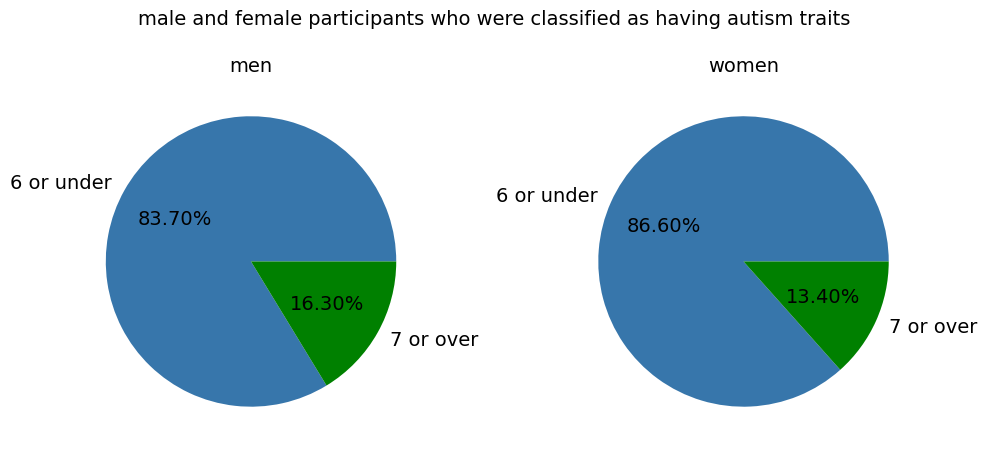

In [13]:
 total = len(screening_data_combined)

classified_as_yes = screening_data_combined[(screening_data_combined["Class"] >= "YES")]

men = (classified_as_yes["Sex"] == "m").sum()

women = len(classified_as_yes) - men

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].pie(
    [total - men, men],
    labels=["6 or under", "7 or over"],
    colors=["#3776ab", "green"],
    textprops={"fontsize": 14},
    autopct="%1.2f%%"
)
ax[0].set_title("men", fontsize=14)

ax[1].pie(
    [total - women, women],
    labels=["6 or under", "7 or over"],
    colors=["#3776ab", "green"],
    textprops={'fontsize': 14},
    autopct='%1.2f%%'
)
ax[1].set_title("women", fontsize=14)

plt.tight_layout()
plt.suptitle("male and female participants who were classified as having autism traits", y=0.92, fontsize=14)

plt.savefig("Stage3-PieChart-Gender-Participants-Age.png")

plt.show()

These pie charts compare the percentage of men vs the percentage of women who are classified as having autism traits via the ASDTests screening app. It couyld indicate that males are more likely to be classified as having autism traits. This also matches existing data, which shows that males have higher rates of autism diagnosis.

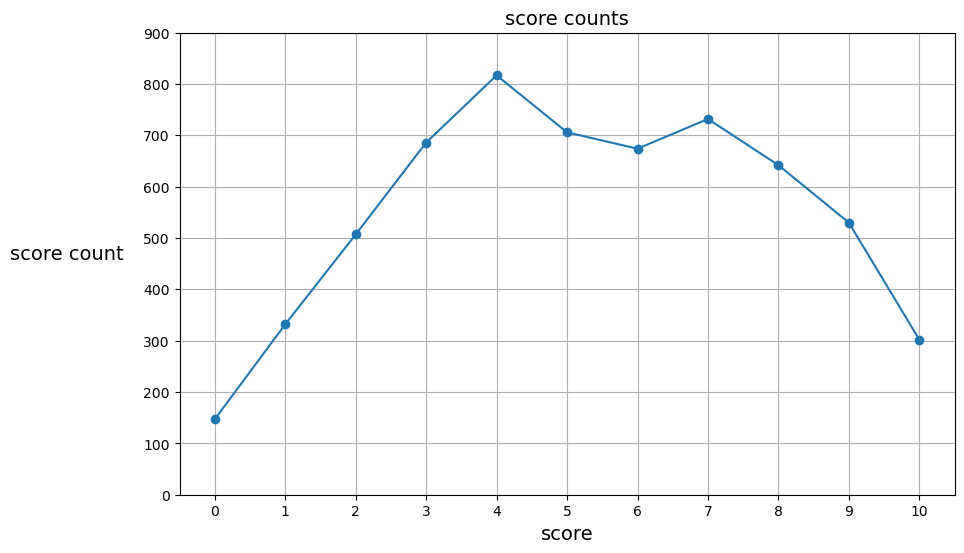

In [14]:
score_counts = screening_data_combined["Score"].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.plot(score_counts, marker='o', linestyle='-')

plt.xticks(range(11))
plt.yticks(range(0, 901, 100))
plt.xlabel("score", fontsize=14)
plt.ylabel("score count", rotation="horizontal", labelpad=55, fontsize=14)
plt.title("score counts", fontsize=14)
plt.grid()

# Save the graph as a PNG
plt.savefig(
    'Stage3-LineChart-QChat-Scores-Participants.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight',   # Remove extra whitespace
    facecolor='white'
)

plt.show()

This line graph measures the prevalence of scores on the Q-chat-10 survey. Most participants score somewhere in the middle. Few participants score 10 or close to 10, so maybe being mildly autistic is more common than being highly autistic.

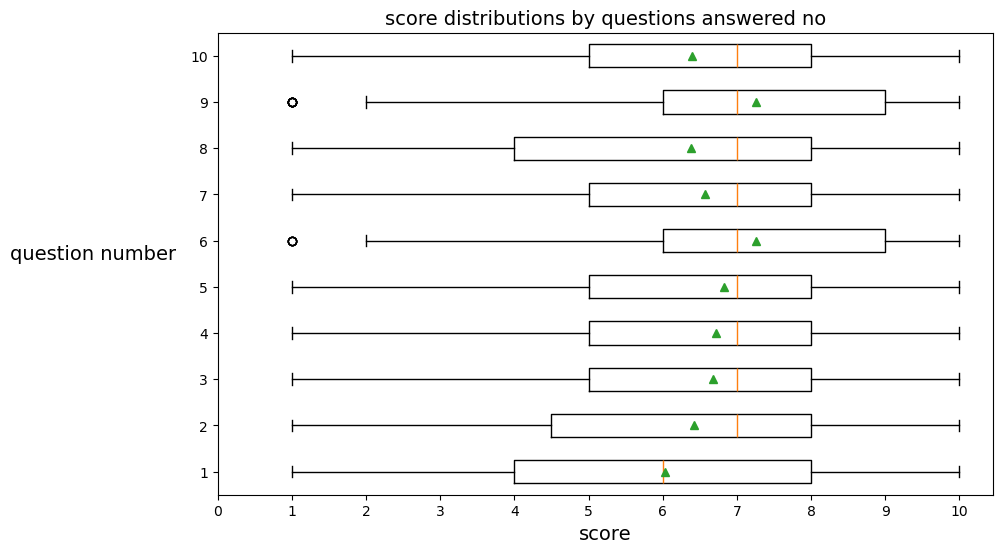

In [15]:
yes_on_a1_to_a10_scores = [screening_data_combined[screening_data_combined[f"A{n}"] == 1]["Score"] for n in range(1, 11)]

plt.figure(figsize=(10, 6))

plt.boxplot(yes_on_a1_to_a10_scores, vert=False, showmeans=True)

plt.xticks(range(11))
plt.yticks(range(1, 11))
plt.xlabel("score", fontsize=14)
plt.ylabel("question number", rotation="horizontal", labelpad=70, fontsize=14)
plt.title("score distributions by questions answered no", fontsize=14)

plt.savefig("Stage3-BoxPlot-Qchat-Scores-Question-No.png")

plt.show()

These box plots show the distributions of scores for people who answered "no" to each of the ten Q-chat-10 questions. Question 1 has a relatively low associated average and median score. Questions 9 and 6 have high averages and interquartile ranges. Each question except for 1 has an associated median score of 7. This could indicate that questions 9 and 6 are better predictors of autism than the other questions, especially question 1.

This joint plot shows the scatter relationship between age and Q-Chat-10 score, along with their individual distributions along the margins. It gives a more complete picture of how these variables relate and whether one group skews higher or lower in either dimension. It also helps assess if any clusters or trends are present in the data.

## Reduce the data into relevant

This is needed to simplify the data used in these visualizations

In [16]:
# Clean column names
df = df_toddlers.copy()
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

family_asd = pd.crosstab(df['family_mem_with_asd'], df['class/asd_traits'])
jaundice_asd = pd.crosstab(df['jaundice'], df['class/asd_traits'])
scatter_df = df.dropna(subset=['age_mons', 'qchat-10-score', 'class/asd_traits'])

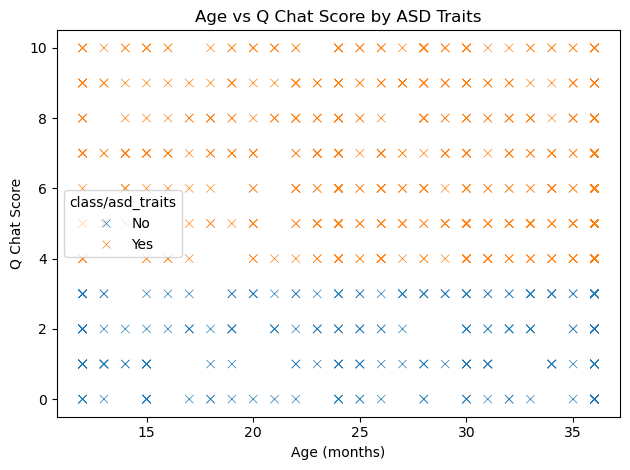

In [17]:
# =========================
# Visualization 1: Age vs Q Chat Score by ASD Traits (Scatter Plot)
# =========================
scatter_df = df.dropna(subset=['age_mons', 'qchat-10-score', 'class/asd_traits'])
fig3, ax3 = plt.subplots()
sns.scatterplot(
    data=scatter_df,
    x='age_mons',
    y='qchat-10-score',
    hue='class/asd_traits',
    marker='x',  
    ax=ax3
)
ax3.set_title('Age vs Q Chat Score by ASD Traits')
ax3.set_xlabel('Age (months)')
ax3.set_ylabel('Q Chat Score')
fig3.tight_layout()

# Save the graph as a PNG
fig3.savefig(
    'Stage3-ScatterPlot-QChat-Scores-Age.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight',   # Remove extra whitespace
    facecolor='white'
)

This heatmap visualizes a frequency table showing how many toddlers fall into each combination of ASD trait classification and family ASD history. The intensity of the color corresponds to the count, making it easier to spot the most common combinations. This compact format highlights patterns that may not be obvious in bar plots.

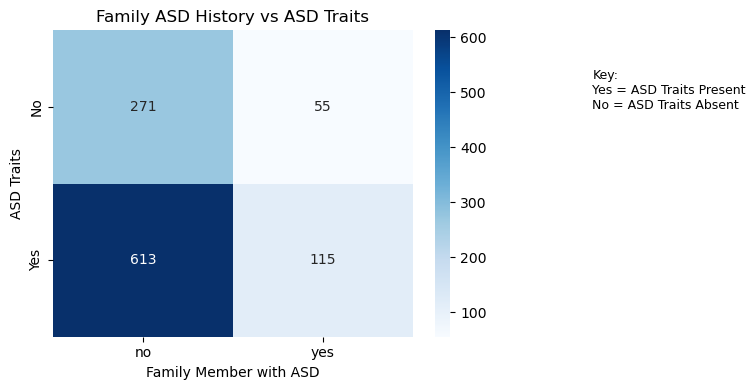

In [18]:
# Strip column names to remove hidden spaces
df.columns = df.columns.str.strip()

heatmap_data = pd.crosstab(df['class/asd_traits'], df['family_mem_with_asd'])

plt.figure(figsize=(8, 4))  
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt='d', cbar=True)
plt.title("Family ASD History vs ASD Traits")
plt.xlabel("Family Member with ASD")
plt.ylabel("ASD Traits")

# Add a legend)
plt.text(3, 0.25, "Key:\nYes = ASD Traits Present\nNo = ASD Traits Absent", fontsize=9, va='top')

plt.tight_layout()

# Save the graph as a PNG
plt.savefig(
    'Stage3-Heatmap-Family-ASD-Scores-Confusion-Matrix.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight',   # Remove extra whitespace
    facecolor='white'
)

plt.show()

This joint plot shows the scatter relationship between age and Q-Chat-10 score, along with their individual distributions along the margins. It gives a more complete picture of how these variables relate and whether one group skews higher or lower in either dimension. It also helps assess if any clusters or trends are present in the data.

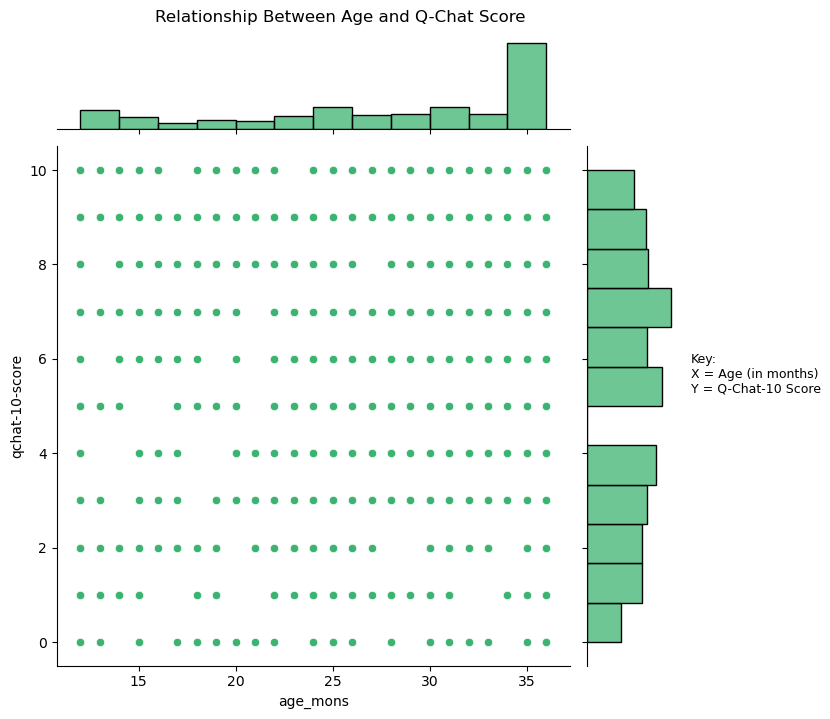

In [19]:
df.columns = df.columns.str.strip()

# Create the joint plot
plot = sns.jointplot(
    data=df,
    x='age_mons',
    y='qchat-10-score',
    kind='scatter',
    height=7,
    color='mediumseagreen'
)

# Set the main title
plot.fig.suptitle("Relationship Between Age and Q-Chat Score", y=1.02)

# Add manual key on the side
plot.fig.text(1, 0.5, "Key:\nX = Age (in months)\nY = Q-Chat-10 Score", fontsize=9, va='center')

# Save the graph as a PNG
fig3.savefig(
    'Stage3-Joinplot-QChat-Scores-Age.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight',   # Remove extra whitespace
    facecolor='white'
)

plt.show()

# Conclusion and Findings



In evaluating this dataset further, and exploring the relationships between the Q-Chat Questions, their scores, and the other features collected for the toddlers assessed for Autism, it became clear which questions were closely related to Autism Diagnosis. In addition, correlation was strong between ASD Diagnosis and Qchat-10 scores.

Interestingly, toddlers who had ASD in their immediate family were not more likely to have an Autism diagnosis; there does not seem to be a correlation between existing family diagnoses and a new family member being diagnosed as well. The data is very skewed towards older toddlers; those who are 35 months old have the largest number of samples (either with ASD or without).

In analyzing the Q-chat questions, there seem to be strong correlations between verbal communication questions and non-verbal communication questions. This suggests that those questions are often answered the same, and show a higher likelihood for ASD if one of the questions was answered yes. The non-verbal questions are A10, A1, and A2 and the verbal ones are: A10, A8, A3.